In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [45]:
df = pd.read_csv('train.csv').drop(columns=['Artist Name', 'Track Name', 'Class'])
df.fillna(0, inplace = True)

keys = df.keys()

maxes = np.max(df[keys[1:]], axis = 0)
mins = np.min(df[keys[1:]], axis = 0)
dfnorm = df.copy()
dfnorm[keys[1:]] = (df[keys[1:]]-mins)/(maxes-mins)

In [46]:
pca = PCA(n_components=2).fit_transform(dfnorm)

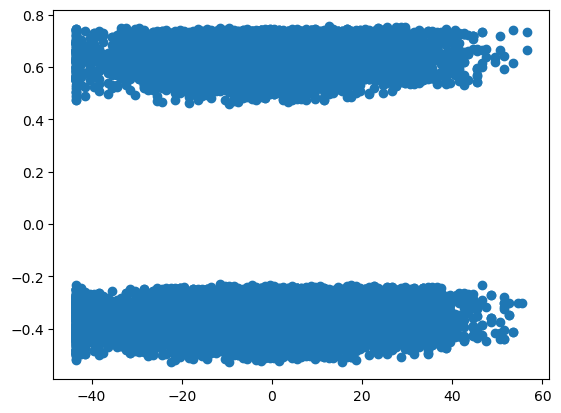

In [47]:
plt.scatter(pca[:,0], pca[:,1])

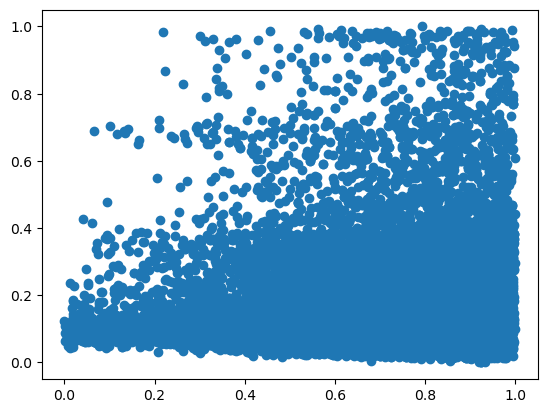

In [60]:
plt.scatter(dfnorm[keys[2]],dfnorm[keys[9]])